# Smoke Detection

## Description of features

1. ```UTC``` - Time at which observation was recorded.

2. ```Temperature [C]``` - Temperature of surroundings.

3. ```Humidity [%]``` - Air humidity during the observation.

4. ```TVOC [ppb]``` - Total Volatile Organic Compounds present during the observation.

5. ```eCo2 [ppm]``` - CO2 equivalent concentration during the observation. 

6. ```Raw H2``` - The amount of Raw Hydrogen present in the surroundings during the observation.

7. ```Raw Ethanol``` - The amount of Raw Ethanol present in the surroundings during the observation.

8. ```Pressure [hPA]``` - Air pressure measured during the observation.

9. ```PM1.0``` - Paticulate matter of diameter less than 1.0 micrometer .

10. ```PM2.5``` - Paticulate matter of diameter less than 2.5 micrometer.

11. ```NC0.5``` - Concentration of particulate matter of diameter less than 0.5 micrometers.

12. ```NC1.0``` - Concentration of particulate matter of diameter less than 1.0 micrometers.

13. ```NC2.5``` -  Concentration of particulate matter of diameter less than 2.5 micrometers.

15. ```Fire Alarm``` - Variable if fire alarm was triggered.

## Importing libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [65]:
data = pd.read_csv('smoke_detection_iot.csv',index_col = False)
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [66]:
data.shape

(62630, 16)

## Cleaning data

In [67]:
print(data.isnull().sum())
print(data.duplicated().value_counts())

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64
False    62630
dtype: int64


Dataset doesn't contain any duplicated or missing values.

## Info about the data

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [69]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


## Visualization of the data

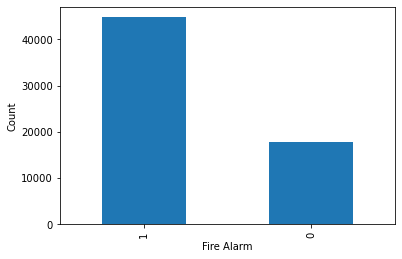

In [70]:
data['Fire Alarm'].value_counts().plot(kind='bar')
plt.xlabel('Fire Alarm')
plt.ylabel('Count')
plt.show()

#### Observations:
* Firealarm was triggered 44757 times.
* Firealarm wasn't triggered 17873 times.
* Data is unbalanced we have more triggers than non-triggers.

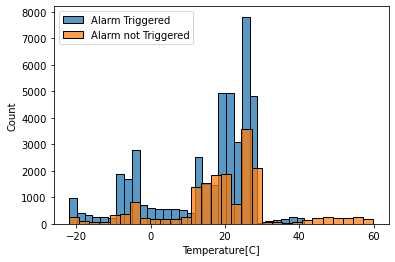

In [71]:

sns.histplot(data=data[data["Fire Alarm"]==1],x="Temperature[C]",bins=30, color = "#1f77b4")
sns.histplot(data=data[data["Fire Alarm"]==0],x="Temperature[C]",bins=30, color = "#ff7f0e")
plt.legend(labels=['Alarm Triggered', 'Alarm not Triggered'])
mean_1 = (data.loc[data['Fire Alarm'] == 1, ['Temperature[C]']]).mean()
mean_0 = (data.loc[data['Fire Alarm'] == 0, ['Temperature[C]']]).mean()

#### Observations:
  
* Most firealarm triggers happened with temperature between 18-28C .
* Most non-triggers happened with temperature between 24-28C .
* Average temperature when firealarm was triggered: 14.48C .
* Average temperature when the firealarm wasn't triggered: 19.69C.

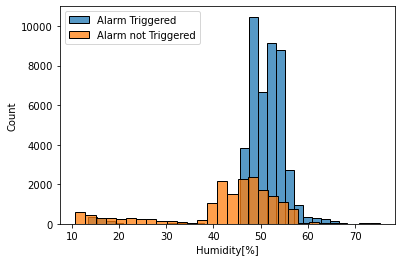

In [72]:
sns.histplot(data=data[data["Fire Alarm"]==1],x="Humidity[%]",bins=30, color = "#1f77b4")
sns.histplot(data=data[data["Fire Alarm"]==0],x="Humidity[%]",bins=30, color = "#ff7f0e")

plt.legend(labels=['Alarm Triggered', 'Alarm not Triggered'])

#### Observations: 
* Most firealarm triggers happened with humidity between 46-56%.
* Most non-triggerings happened with humidity between 40-48%.

## Correlations

<AxesSubplot:>

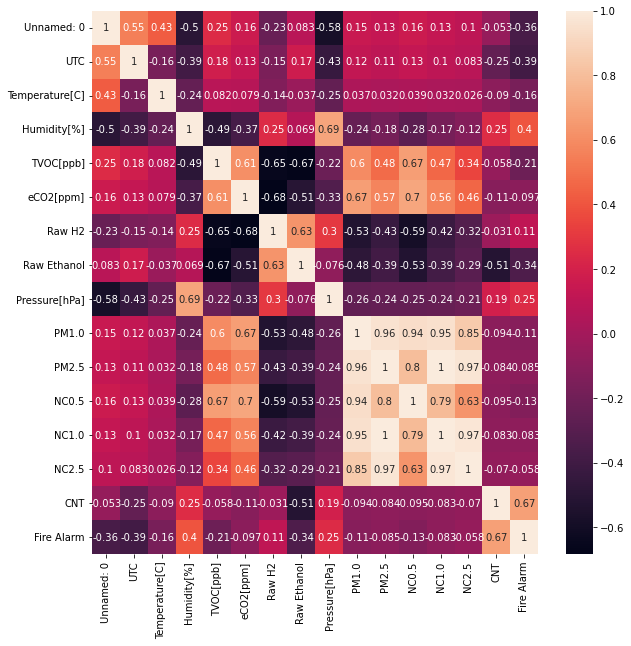

In [73]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True)

### Observations:
* Very strong positive correlations: 
    * PM1.0 & eCO2, PM2.5, NC0.5, NC1.0, NC2.5. PM2.5
    * NC0.5, NC1.0, NC2.5. NC0.5 & NC1.0, NC2.5.
* Strong positive correlations
    * Humidity & Pressure
    * TVOC & PM1.0
    * TVOC & NC0.5
    * eCO2 & PM1.0
    * eCO2 & NC0.5
    * Ethanol & Raw H2

## Machine learning model creation & Evaluation

### Drop unecessary columns

In [74]:
data = data.drop("CNT", axis = 1)
data = data.drop("UTC", axis = 1)
data = data.drop("Unnamed: 0", axis = 1)
data.head(100)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21.323,53.65,23,419,12528,19619,939.799,0.22,0.69,0.39,0.788,0.449,0
96,21.336,53.96,33,421,12524,19614,939.801,0.20,0.63,0.36,0.718,0.409,0
97,21.349,54.25,21,417,12530,19610,939.795,0.16,0.49,0.28,0.561,0.320,0
98,21.362,54.52,19,418,12529,19626,939.799,0.14,0.44,0.25,0.501,0.286,0


### Split data into train and test

In [75]:
ratio_train = 0.7
ratio_val = 0.3

x = data.drop("Fire Alarm", axis=1)
y = data["Fire Alarm"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=ratio_test)


In [76]:
print(x_train.shape)
print(x_test.shape)

(43841, 12)
(18789, 12)


### Balancing of the dataset

In [77]:
over = ADASYN(sampling_strategy=0.9)
under = RandomUnderSampler(sampling_strategy=0.95)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
x_train_bal, y_train_bal = pipeline.fit_resample(x_train, y_train)

### Training models

##### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
parameters = {"n_estimators":[100, 200, 300],
              "random_state":[3, 5, 6],
              "max_depth": [None, 1, 2]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(x_train_bal, y_train_bal)
y_pred = clf.predict(x_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("Confusion matrix:\n%s\n" % confusion_matrix_result)
print("auc:%s\n" % auc)
clf.best_params_

Confusion matrix:
[[13362     2]
 [    0  5425]]

auc:1.0



{'max_depth': None, 'n_estimators': 100, 'random_state': 6}

$$acc = \frac{TN + TP}{TN + FP + TP + FN} = \frac{13362 + 5425}{13362 + 5425 + 0 + 2} \approx 0.99989$$<br>

#### K-Nearest Neighbour Classifier

In [79]:
parameters = {"n_neighbors":[1, 5, 10],
              "leaf_size": [10, 20, 30]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(x_train_bal, y_train_bal)
y_pred = clf.predict(x_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("Confusion matrix:\n%s\n" % confusion_matrix_result)
print("auc:%s\n" % auc)

clf.best_params_

Confusion matrix:
[[13342    22]
 [    1  5424]]

auc:0.9998327027560114



{'leaf_size': 10, 'n_neighbors': 10}

$$acc = \frac{TN + TP}{TN + FP + TP + FN} = \frac{13342 + 5424}{13342 + 5424 + 1 + 22} \approx 0.9988 $$<br>

#### Decision Tree Classifier

In [80]:
parameters = {"criterion": ["gini", "entropy", "log_loss"],
              "max_depth": [None, 1, 2, 3],
             "random_state":[0, 2, 4, 6, 100],
             "min_samples_split":[2, 5 ,10, 15, 20]}
dtc = DecisionTreeClassifier()

clf = GridSearchCV(dtc, parameters)
clf.fit(x_train_bal, y_train_bal)
y_pred = clf.predict(x_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred, labels=[1,0])  # Label=[1,0], otherwise predicted and actual axes are swapped
auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print("Confusion matrix:\n%s\n" % confusion_matrix_result)
print("auc:%s\n" % auc)
clf.best_params_

Confusion matrix:
[[13355     9]
 [    0  5425]]

auc:0.9996632744687219



{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'random_state': 4}

$$acc = \frac{TN + TP}{TN + FP + TP + FN} = \frac{13355 + 5425}{13355 + 5425 + 9 + 0} = 0.99952 $$<br>

#### Results

Best accuracy with Random Forest Classifier with accuracy of 0.9998935604044704